# [MATH2504 Programming of Simulation, Analysis, and Learning Systems at The University of Queensland](https://courses.smp.uq.edu.au/MATH2504/)

## Semester 2, 2022

# Practical H: Towards Project 3 - Dataframes

In this practical we work with `DataFrames.jl` towards project 3.

We use a small Kaggle datset dealing with [graduate admissions](https://www.kaggle.com/mohansacharya/graduate-admissions). We also placed a copy of it in the course's repo. See:

`https://raw.githubusercontent.com/yoninazarathy/ProgrammingCourse-with-Julia-SimulationAnalysisAndLearningSystems/main/data/Admission_Predict.csv`

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

1. GRE Scores ( out of 340 )
1. TOEFL Scores ( out of 120 )
1. University Rating ( out of 5 )
1. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
1. Undergraduate GPA ( out of 10 )
1. Research Experience ( either 0 or 1 )
1. Chance of Admit ( ranging from 0 to 1 )

In [3]:
using DataFrames, HTTP, CSV, Plots, StatsPlots, StatsBase

In [4]:
data_from_web = HTTP.request("GET","https://raw.githubusercontent.com/yoninazarathy/"*
                "ProgrammingCourse-with-Julia-SimulationAnalysisAndLearningSystems/main/data/Admission_Predict.csv")
string_from_web = String(data_from_web.body);


In [5]:
df = CSV.read(IOBuffer(string_from_web), DataFrame)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,1,337,118,4,4.5,4.5,9.65
2,2,324,107,4,4.0,4.5,8.87
3,3,316,104,3,3.0,3.5,8.0
4,4,322,110,3,3.5,2.5,8.67
5,5,314,103,2,2.0,3.0,8.21
6,6,330,115,5,4.5,3.0,9.34
7,7,321,109,3,3.0,4.0,8.2
8,8,308,101,2,3.0,4.0,7.9
9,9,302,102,1,2.0,1.5,8.0


In [6]:
names(df)

9-element Vector{String}:
 "Serial No."
 "GRE Score"
 "TOEFL Score"
 "University Rating"
 "SOP"
 "LOR "
 "CGPA"
 "Research"
 "Chance of Admit "

In [7]:
df[:,"GRE Score"] |> println

[337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328, 307, 311, 314, 317, 319, 318, 303, 312, 325, 328, 334, 336, 340, 322, 298, 295, 310, 300, 327, 338, 340, 331, 320, 299, 300, 304, 307, 308, 316, 313, 332, 326, 322, 329, 339, 321, 327, 313, 312, 334, 324, 322, 320, 316, 298, 300, 311, 309, 307, 304, 315, 325, 325, 327, 316, 318, 328, 332, 336, 321, 314, 314, 329, 327, 301, 296, 294, 312, 340, 320, 322, 340, 319, 315, 317, 314, 316, 318, 299, 298, 301, 303, 304, 306, 331, 332, 323, 322, 312, 314, 317, 326, 316, 329, 338, 331, 304, 305, 321, 301, 320, 311, 310, 299, 290, 296, 327, 335, 334, 310, 308, 301, 300, 323, 319, 326, 333, 339, 303, 309, 323, 333, 314, 312, 316, 326, 318, 329, 332, 331, 340, 325, 320, 315, 326, 339, 311, 334, 332, 321, 324, 326, 312, 315, 309, 306, 297, 315, 298, 318, 317, 329, 322, 302, 313, 293, 311, 312, 334, 322, 323, 321, 320, 329, 319, 309, 307, 300, 305, 299, 314, 316, 327, 317, 335, 331, 324, 324, 323, 322, 336, 316, 307, 306, 310, 311, 313,

In [8]:
rename!(df, "GRE Score" => "GREScore");

In [9]:
df.GREScore |> println

[337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328, 307, 311, 314, 317, 319, 318, 303, 312, 325, 328, 334, 336, 340, 322, 298, 295, 310, 300, 327, 338, 340, 331, 320, 299, 300, 304, 307, 308, 316, 313, 332, 326, 322, 329, 339, 321, 327, 313, 312, 334, 324, 322, 320, 316, 298, 300, 311, 309, 307, 304, 315, 325, 325, 327, 316, 318, 328, 332, 336, 321, 314, 314, 329, 327, 301, 296, 294, 312, 340, 320, 322, 340, 319, 315, 317, 314, 316, 318, 299, 298, 301, 303, 304, 306, 331, 332, 323, 322, 312, 314, 317, 326, 316, 329, 338, 331, 304, 305, 321, 301, 320, 311, 310, 299, 290, 296, 327, 335, 334, 310, 308, 301, 300, 323, 319, 326, 333, 339, 303, 309, 323, 333, 314, 312, 316, 326, 318, 329, 332, 331, 340, 325, 320, 315, 326, 339, 311, 334, 332, 321, 324, 326, 312, 315, 309, 306, 297, 315, 298, 318, 317, 329, 322, 302, 313, 293, 311, 312, 334, 322, 323, 321, 320, 329, 319, 309, 307, 300, 305, 299, 314, 316, 327, 317, 335, 331, 324, 324, 323, 322, 336, 316, 307, 306, 310, 311, 313,

In [10]:
names(df)

9-element Vector{String}:
 "Serial No."
 "GREScore"
 "TOEFL Score"
 "University Rating"
 "SOP"
 "LOR "
 "CGPA"
 "Research"
 "Chance of Admit "

In [11]:
rename!(df,"Serial No."=>"SerialNo");
rename!(df,"TOEFL Score"=>"TOEFLScore");
rename!(df,"University Rating"=>"UniversityRating");
rename!(df,"Chance of Admit "=>"ChanceofAdmit");#notice that original name canw with extra whitespace

In [12]:
names(df)

9-element Vector{String}:
 "SerialNo"
 "GREScore"
 "TOEFLScore"
 "UniversityRating"
 "SOP"
 "LOR "
 "CGPA"
 "Research"
 "ChanceofAdmit"

In [13]:
summarystats(df.GREScore)

Summary Stats:
Length:         400
Missing Count:  0
Mean:           316.807500
Minimum:        290.000000
1st Quartile:   308.000000
Median:         317.000000
3rd Quartile:   325.000000
Maximum:        340.000000


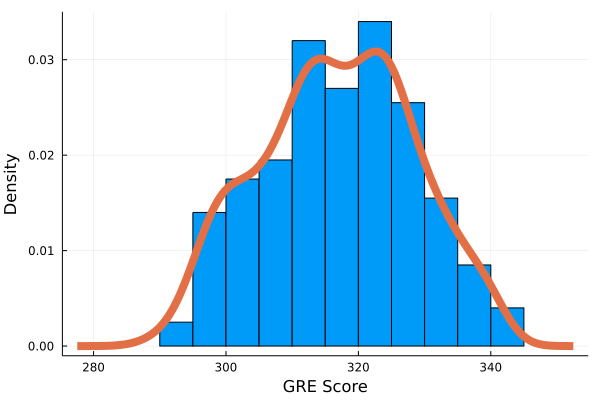

In [14]:
histogram(df.GREScore, legend = false, xlabel = "GRE Score", ylabel = "Density",normed=true)
density!(df.GREScore,lw=8)

In [15]:
summarystats(df.ChanceofAdmit)

Summary Stats:
Length:         400
Missing Count:  0
Mean:           0.724350
Minimum:        0.340000
1st Quartile:   0.640000
Median:         0.730000
3rd Quartile:   0.830000
Maximum:        0.970000


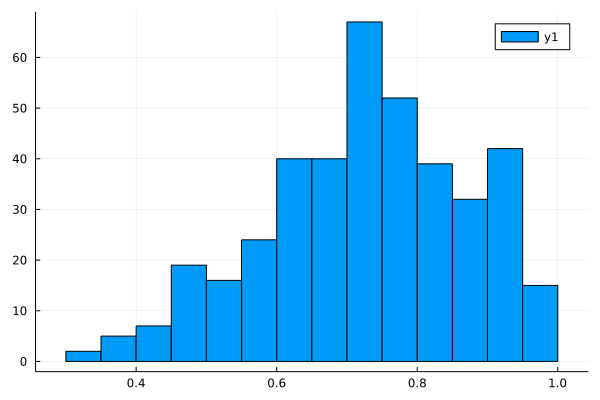

In [16]:
histogram(df.ChanceofAdmit)

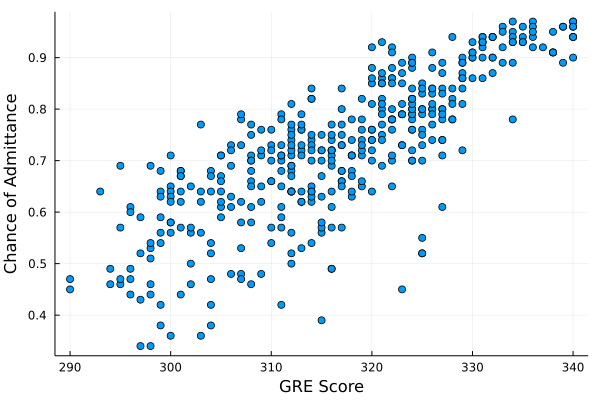

In [17]:
scatter(df.GREScore, df.ChanceofAdmit, label = false, 
            xlabel = "GRE Score", ylabel = "Chance of Admittance")

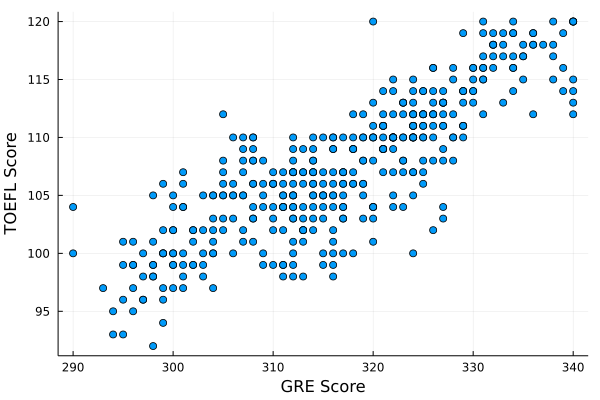

In [18]:
scatter(df.GREScore, df.TOEFLScore, label = false, 
            xlabel = "GRE Score", ylabel = "TOEFL Score")

In [19]:
unique(df.Research)

2-element Vector{Int64}:
 1
 0

In [20]:
counts(df.Research)

2-element Vector{Int64}:
 181
 219

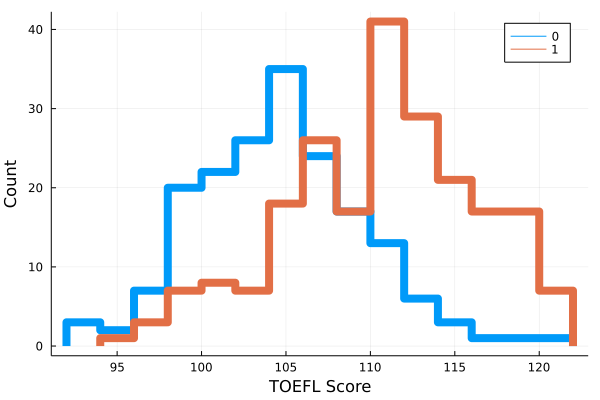

In [21]:
stephist(df.TOEFLScore, bins=20, group = df.Research, 
            lw = 8, xlabel = "TOEFL Score", ylabel="Count")

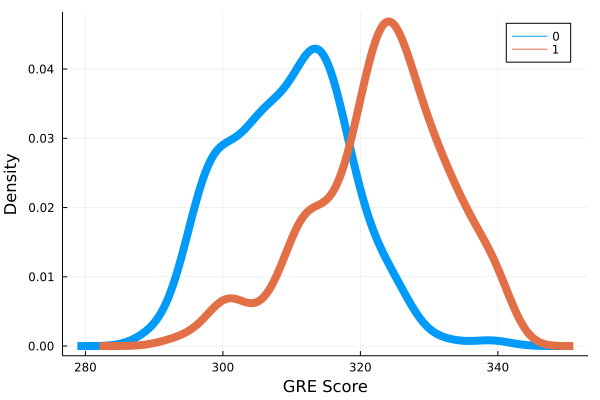

In [22]:
density(df.GREScore, bins=20, group = df.Research,
        lw = 8, xlabel = "GRE Score", ylabel = "Density")

In [23]:
X = df[:,[:GREScore, :TOEFLScore, :CGPA, :UniversityRating ]] |> Tables.Matrix |> float

400×4 Matrix{Float64}:
 337.0  118.0  9.65  4.0
 324.0  107.0  8.87  4.0
 316.0  104.0  8.0   3.0
 322.0  110.0  8.67  3.0
 314.0  103.0  8.21  2.0
 330.0  115.0  9.34  5.0
 321.0  109.0  8.2   3.0
 308.0  101.0  7.9   2.0
 302.0  102.0  8.0   1.0
 323.0  108.0  8.6   3.0
 325.0  106.0  8.4   3.0
 327.0  111.0  9.0   4.0
 328.0  112.0  9.1   4.0
   ⋮                 
 296.0   97.0  7.8   2.0
 320.0  108.0  8.44  3.0
 314.0  102.0  8.24  2.0
 318.0  106.0  8.65  3.0
 326.0  112.0  9.12  4.0
 317.0  104.0  8.76  2.0
 329.0  111.0  9.23  4.0
 324.0  110.0  9.04  3.0
 325.0  107.0  9.11  3.0
 330.0  116.0  9.45  4.0
 312.0  103.0  8.78  3.0
 333.0  117.0  9.66  4.0

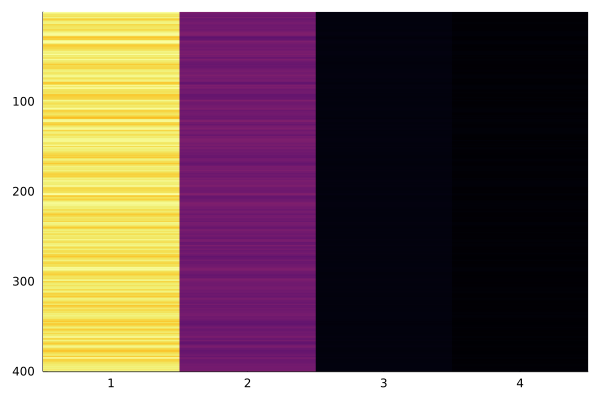

In [24]:
heatmap(X, yflip=true, legend = false)

In [25]:
n, d = size(df)

(400, 9)

In [26]:
using Random
Random.seed!(0)
p_validate = 0.2
n_validate = floor(Int, p_validate*n)
validate_index_set = sample(1:n, n_validate, replace = false)
train_index_set = setdiff(1:n, validate_index_set);

In [27]:
n_validate = length(validate_index_set)
n_train = length(train_index_set)
n_train, n_validate

(320, 80)

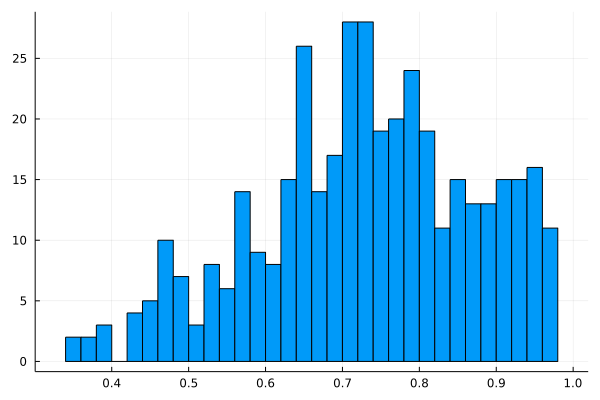

In [28]:
y = df.ChanceofAdmit;
histogram(y,legend=false,bins=30)